In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 172 µs (started: 2021-03-15 02:46:03 +00:00)


## **Homework 1**

다음의 각 문항에 대해 실습목표를 완수하고, 출력 결과를 확인합니다.

**※ 제출방법:** 실습내용 및 출력 결과가 저장된 Colab 파일(`*.ipynb`)를 KLMS의 과제 항목에 업로드

### **실습 1. MNIST 데이터의 인덱스를 수정하여 학습/테스트 데이터를 확인하세요.**

* 인덱스를 변경하여 다른 데이터도 같은 방법으로 출력할 수 있습니다.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

time: 1.28 ms (started: 2021-03-15 02:49:05 +00:00)


In [8]:
import keras # keras
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

input_train_images = train_images.reshape((60000, 28, 28, 1))
input_train_images = input_train_images.astype('float32') / 255

input_test_images = test_images.reshape((10000, 28, 28, 1))
input_test_images = input_test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

time: 381 ms (started: 2021-03-15 02:48:42 +00:00)


#### (1-a) "<u>학습</u> 데이터" 중에서 <u>"8" 숫자</u>인 인덱스를 발견하고, 결과를 출력하세요.

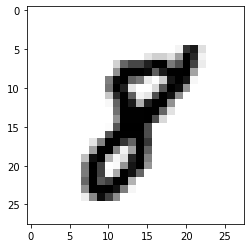

label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
time: 133 ms (started: 2021-03-15 02:49:08 +00:00)


In [11]:
####
# TODO: 다음 index 를 바꿔 학습 데이터와 레이블을 출력
idxs = np.where(np.argmax(train_labels, axis=1)==8)
idx = idxs[0][0]
####

digit = train_images[idx]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print ("label: {}".format(train_labels[idx]))

#### (1-b) 위의 1-a 코드 셀을 참고하여, "<u>테스트</u> 데이터" 중에서 <u>"3" 숫자</u>인 인덱스를 발견하고, 결과를 출력하세요.

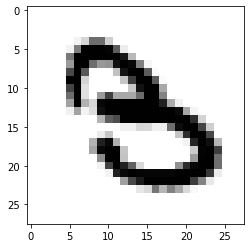

label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
time: 128 ms (started: 2021-03-15 02:49:33 +00:00)


In [12]:
####
# TODO: 다음 index 를 바꿔 학습 데이터와 레이블을 출력
idxs = np.where(np.argmax(test_labels, axis=1)==3)
idx = idxs[0][0]
####

# TODO: 테스트 데이터의 이미지 및 레이블을 출력

digit = test_images[idx]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
print ("label: {}".format(test_labels[idx]))

### **실습 2. 간단한 모델을 학습할 때, Colab의 런타임 유형에 따라 얼마나 시간이 차이나는지 비교하세요.**

* 본문의 2-2절에서 코드 셀을 참고하여 간단한 모델을 학습하는 코드 블록을 완성하세요.
* (참고) 런타임 유형을 변경하면 <u>Colab의 리소스가 초기화</u> 됩니다.
  * 즉, 변수 선언, 모듈 임포트 등을 다시 실행해야 합니다.
  * 그러나 출력 결과의 내용은 없어지지 않으므로, CPU 및 GPU의 실행 결과를 남겨둔 상태로 제출하세요.
  * 활용 팁 파트와 같이, 코드 셀의 실행시간 측정 모듈 `autotime`을 적용해야 합니다.

#### 2-a) 런타임 유형이 <u>**CPU**</u>일 때 실행결과 확인

In [ ]:
# TODO: 모델 정의
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

time: 65.8 ms (started: 2021-03-15 00:52:31 +00:00)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

input_train_images = train_images.reshape((60000, 28, 28, 1))
input_train_images = input_train_images.astype('float32') / 255

input_test_images = test_images.reshape((10000, 28, 28, 1))
input_test_images = input_test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# TODO: 모델 학습
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(input_train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 44s 46ms/step - loss: 0.3918 - accuracy: 0.8739
Epoch 2/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0546 - accuracy: 0.9831
Epoch 3/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0330 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0178 - accuracy: 0.9946


time: 3min 35s (started: 2021-03-15 00:52:37 +00:00)


In [ ]:
test_loss, test_acc = model.evaluate(input_test_images, test_labels)
print(test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0324 - accuracy: 0.9901
0.9901000261306763
time: 2.74 s (started: 2021-03-15 00:56:26 +00:00)


#### 2-b) 런타임 유형이 <u>**GPU**</u>일 때 실행결과 확인

In [ ]:
# TODO: 모델 정의
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

time: 1.94 s (started: 2021-03-15 00:58:22 +00:00)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

input_train_images = train_images.reshape((60000, 28, 28, 1))
input_train_images = input_train_images.astype('float32') / 255

input_test_images = test_images.reshape((10000, 28, 28, 1))
input_test_images = input_test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

time: 380 ms (started: 2021-03-15 00:58:34 +00:00)


In [ ]:
# TODO: 모델 학습
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(input_train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 4ms/step - loss: 0.3866 - accuracy: 0.8772
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0509 - accuracy: 0.9844
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0238 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0174 - accuracy: 0.9951


time: 20.6 s (started: 2021-03-15 00:58:35 +00:00)


In [ ]:
test_loss, test_acc = model.evaluate(input_test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0278 - accuracy: 0.9915
0.9915000200271606
time: 862 ms (started: 2021-03-15 00:58:56 +00:00)


### **실습 3. 간단한 모델의 구조를 변경해 본 후, 성능 테스트 결과가 변화하는 것을 확인하세요.**

* 본문의 2-2절 및 2-3절에서 코드 셀을 참고하여 간단한 모델을 학습하는 코드 블록을 완성하세요.
* 간단한 모델에 <u>레이어를 최소 1개 이상</u> 더 추가해보세요.

**변경 사항**

- Filter 32 -> 64로 변경
- 마지막에 MaxPooling2D layer 추가

In [14]:
from keras import layers
from keras import models

time: 1.83 ms (started: 2021-03-15 02:51:30 +00:00)


In [21]:
# TODO: 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

time: 57.4 ms (started: 2021-03-15 03:13:30 +00:00)


In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

input_train_images = train_images.reshape((60000, 28, 28, 1))
input_train_images = input_train_images.astype('float32') / 255

input_test_images = test_images.reshape((10000, 28, 28, 1))
input_test_images = input_test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [23]:
# TODO: 모델 학습
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(input_train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 38s 5ms/step - loss: 0.4355 - accuracy: 0.8540
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0596 - accuracy: 0.9820
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0409 - accuracy: 0.9873
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0311 - accuracy: 0.9909
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0240 - accuracy: 0.9923


time: 56.5 s (started: 2021-03-15 03:13:50 +00:00)


In [24]:
test_loss, test_acc = model.evaluate(input_test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0615 - accuracy: 0.9845
0.984499990940094
time: 898 ms (started: 2021-03-15 03:14:46 +00:00)


### AveragePooling

In [25]:
# TODO: 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

time: 57 ms (started: 2021-03-15 03:16:13 +00:00)


In [26]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
average_pooling2d_2 (Average (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [27]:
# TODO: 모델 학습
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(input_train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.7547 - accuracy: 0.7482
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.1377 - accuracy: 0.9572
Epoch 3/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0868 - accuracy: 0.9737
Epoch 4/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0644 - accuracy: 0.9796
Epoch 5/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0537 - accuracy: 0.9836


time: 18 s (started: 2021-03-15 03:16:25 +00:00)


In [28]:
test_loss, test_acc = model.evaluate(input_test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0487 - accuracy: 0.9860
0.9860000014305115
time: 845 ms (started: 2021-03-15 03:16:44 +00:00)


### Optimizer - SGD

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

time: 51.1 ms (started: 2021-03-15 03:19:19 +00:00)


In [30]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(input_train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 1.5110 - accuracy: 0.5454
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.2465 - accuracy: 0.9255
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1508 - accuracy: 0.9551
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1190 - accuracy: 0.9637
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0928 - accuracy: 0.9713


time: 16 s (started: 2021-03-15 03:20:10 +00:00)


In [31]:
test_loss, test_acc = model.evaluate(input_test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9683
0.9682999849319458
time: 846 ms (started: 2021-03-15 03:20:29 +00:00)


### Optimizer - Adam

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

time: 58.1 ms (started: 2021-03-15 03:21:45 +00:00)


In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(input_train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.4081 - accuracy: 0.8736
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0515 - accuracy: 0.9835
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0350 - accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0242 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0206 - accuracy: 0.9936


time: 16.7 s (started: 2021-03-15 03:21:47 +00:00)


In [35]:
test_loss, test_acc = model.evaluate(input_test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.9908
0.9908000230789185
time: 964 ms (started: 2021-03-15 03:22:04 +00:00)


### Optimizer - Adagrad

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

time: 55.1 ms (started: 2021-03-15 03:22:06 +00:00)


In [37]:
model.compile(optimizer='adagrad',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(input_train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 2.2489 - accuracy: 0.2509
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 1.2624 - accuracy: 0.7176
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.5217 - accuracy: 0.8540
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4054 - accuracy: 0.8818
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3515 - accuracy: 0.8955


time: 16.4 s (started: 2021-03-15 03:22:06 +00:00)


In [38]:
test_loss, test_acc = model.evaluate(input_test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3050 - accuracy: 0.9093
0.9093000292778015
time: 830 ms (started: 2021-03-15 03:22:22 +00:00)
